In [148]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### (1) Preprocessing: Detect face and eyes


#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4> 

#### Now how do you detect face and eyes?

We will use haar cascade from opencv for this. Here is an article on this: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

In [149]:
img = cv2.imread('./test_images/Sharapova2 .jpg')

In [150]:
img.shape

(400, 400, 3)

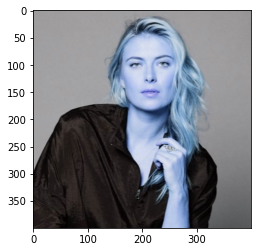

In [151]:
plt.imshow(img)

In [152]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(400, 400)

In [153]:
gray

array([[156, 156, 156, ..., 150, 149, 147],
       [156, 156, 156, ..., 150, 149, 147],
       [156, 156, 156, ..., 150, 149, 147],
       ...,
       [ 32,  32,  34, ...,  92,  92,  91],
       [ 38,  40,  43, ...,  90,  89,  89],
       [ 46,  48,  48, ...,  88,  87,  87]], dtype=uint8)

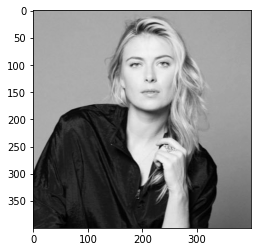

In [154]:
plt.imshow(gray,cmap='gray')

In [155]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[153,  49, 125, 125]], dtype=int32)

In [156]:
(x,y,w,h)=faces[0]
x,y,w,h

(153, 49, 125, 125)

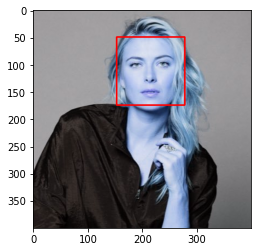

In [157]:
cv2.destroyAllWindows()
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

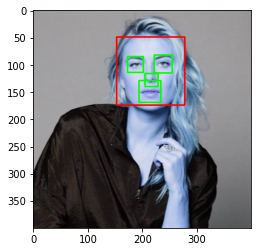

In [158]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


#### (2) Preprocessing: Crop the facial region of the image

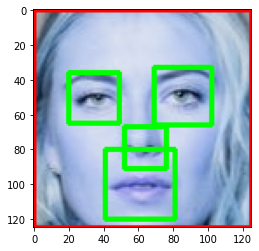

In [159]:
plt.imshow(roi_color,cmap='gray')

In [160]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

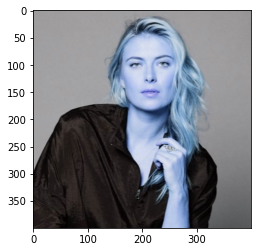

In [161]:
original_img = cv2.imread('./test_images/Sharapova2 .jpg')
plt.imshow(original_img)

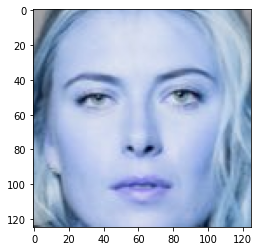

In [162]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/Sharapova2 .jpg')
plt.imshow(cropped_image)

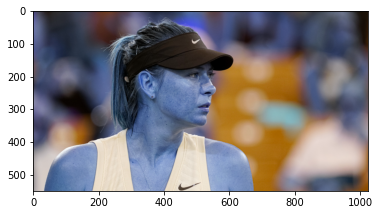

In [163]:
original_img = cv2.imread('./test_images/Sharapova1.jpg')
plt.imshow(original_img)

In [164]:
cropped_image2=get_cropped_image_if_2_eyes('./test_images/Sharapova1.jpg')
cropped_image2

##### path to create a "cropped dir"

In [165]:
path_to_data = "./dataset/"
path_to_crp_data = "./dataset/cropped/"

##### reading the path of  each dir from dataset folder

In [166]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [167]:
img_dirs

['./dataset/shahid_afridi',
 './dataset/cr_ronaldo',
 './dataset/maria_sharipova']

#### creating the cropped folder in dataset dir 

In [168]:
import shutil
if os.path.exists(path_to_crp_data):
    shutil.rmtree(path_to_crp_data)
os.mkdir(path_to_crp_data) 
#or os.makedirs()

In [169]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crp_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



Generating cropped images in folder:  ./dataset/cropped/shahid_afridi
Generating cropped images in folder:  ./dataset/cropped/cr_ronaldo
Generating cropped images in folder:  ./dataset/cropped/maria_sharipova


In [170]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'shahid_afridi': ['./dataset/cropped/shahid_afridi/shahid_afridi6.png',
  './dataset/cropped/shahid_afridi/shahid_afridi46.png',
  './dataset/cropped/shahid_afridi/shahid_afridi12.png',
  './dataset/cropped/shahid_afridi/shahid_afridi23.png',
  './dataset/cropped/shahid_afridi/shahid_afridi10.png',
  './dataset/cropped/shahid_afridi/shahid_afridi8.png',
  './dataset/cropped/shahid_afridi/shahid_afridi1.png',
  './dataset/cropped/shahid_afridi/shahid_afridi50.png',
  './dataset/cropped/shahid_afridi/shahid_afridi51.png',
  './dataset/cropped/shahid_afridi/shahid_afridi38.png',
  './dataset/cropped/shahid_afridi/shahid_afridi45.png',
  './dataset/cropped/shahid_afridi/shahid_afridi34.png',
  './dataset/cropped/shahid_afridi/shahid_afridi29.png',
  './dataset/cropped/shahid_afridi/shahid_afridi53.png',
  './dataset/cropped/shahid_afridi/shahid_afridi52.png',
  './dataset/cropped/shahid_afridi/shahid_afridi40.png',
  './dataset/cropped/shahid_afridi/shahid_afridi24.png',
  './dataset/crop

#### Preprocessing: Use wavelet transform as a feature for traning our model
###### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
### Wavelet transform¶


In [171]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


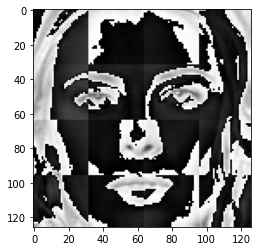

In [172]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [173]:
celebrity_file_names_dict

{'shahid_afridi': ['./dataset/cropped/shahid_afridi/shahid_afridi6.png',
  './dataset/cropped/shahid_afridi/shahid_afridi46.png',
  './dataset/cropped/shahid_afridi/shahid_afridi12.png',
  './dataset/cropped/shahid_afridi/shahid_afridi23.png',
  './dataset/cropped/shahid_afridi/shahid_afridi10.png',
  './dataset/cropped/shahid_afridi/shahid_afridi8.png',
  './dataset/cropped/shahid_afridi/shahid_afridi1.png',
  './dataset/cropped/shahid_afridi/shahid_afridi50.png',
  './dataset/cropped/shahid_afridi/shahid_afridi51.png',
  './dataset/cropped/shahid_afridi/shahid_afridi38.png',
  './dataset/cropped/shahid_afridi/shahid_afridi45.png',
  './dataset/cropped/shahid_afridi/shahid_afridi34.png',
  './dataset/cropped/shahid_afridi/shahid_afridi29.png',
  './dataset/cropped/shahid_afridi/shahid_afridi53.png',
  './dataset/cropped/shahid_afridi/shahid_afridi52.png',
  './dataset/cropped/shahid_afridi/shahid_afridi40.png',
  './dataset/cropped/shahid_afridi/shahid_afridi24.png',
  './dataset/crop

In [174]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict
class_dict['shahid_afridi']

0

In [175]:
x=[]
y=[]
for celebrity_name,training_file in celebrity_file_names_dict.items():
    for traning_image in training_file:
        img=cv2.imread(traning_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(im_har,(32,32))
        combine_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combine_img)
        y.append(class_dict[celebrity_name])

In [176]:
len(x)

159

In [177]:
len(x[0])

4096

In [178]:
x[0]

array([[224],
       [221],
       [235],
       ...,
       [ 92],
       [ 18],
       [ 11]], dtype=uint8)

In [179]:
x=np.array(x).reshape(len(x),4096).astype(float)
x

array([[224., 221., 235., ...,  92.,  18.,  11.],
       [ 14.,  37.,  81., ...,  92.,  18.,  11.],
       [ 52.,  69.,  45., ...,  92.,  18.,  11.],
       ...,
       [ 54.,  52.,  28., ...,  92.,  18.,  11.],
       [137., 132., 117., ...,  92.,  18.,  11.],
       [174., 179., 177., ...,  92.,  18.,  11.]])

In [180]:
x.shape

(159, 4096)

### Data cleaning process is don now wwe are ready to build our model

In [181]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [182]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.825

In [183]:
len(X_test)

40

In [184]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.83      0.83      0.83        12
           2       0.79      0.79      0.79        14

    accuracy                           0.82        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.82      0.82      0.82        40



In [185]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [187]:


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [189]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.815217,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.663406,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.865942,{'logisticregression__C': 1}


In [190]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [193]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.875

In [194]:
best_estimators['svm'].score(X_test,y_test)

0.85

In [195]:
best_estimators['random_forest'].score(X_test,y_test)

0.7

In [196]:
best_clf=best_estimators['logistic_regression']

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  1,  1],
       [ 0, 12,  0],
       [ 3,  0, 11]])

Text(69.0, 0.5, 'Truth')

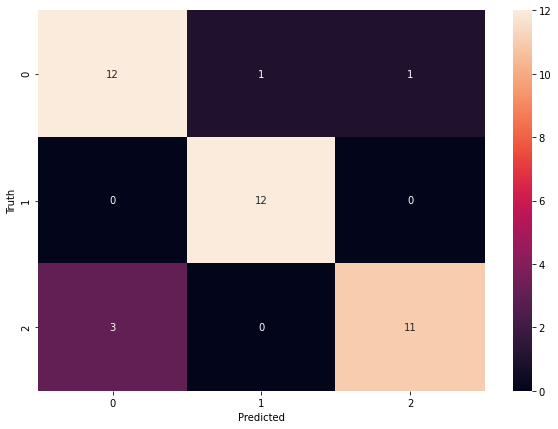

In [198]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [199]:
class_dict

{'shahid_afridi': 0, 'cr_ronaldo': 1, 'maria_sharipova': 2}

In [200]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')


['saved_model.pkl']

In [201]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))